# Customer_Churn_Prediction

# 1. Reading the dataset

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [2]:
#Read the data
data = pd.read_csv('churn_prediction.csv')

In [3]:
#Visualizing first 5 rows of the data
data .head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
#Visulaizing last 5 rows of the data
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [5]:
#Shape of the data - rows and columns
data.shape

(28382, 21)

In [6]:
#Reading the columns of the data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

# 2. Variable type and Typecasting

In [7]:
#Type of variables
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [8]:
#Looking at datatype having int
data.dtypes[data.dtypes== 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary :
1. Customer_id is unique id assigned to the customers, hence integers
2. Age and vintage are also integers
3. Branch code represent different branch of banks, hence should be in category
4. customer_nw_category should be ordinal in nature, hence to be converted in category
5. churn is categorical (0,1), hence to be converted to catgory.

In [9]:
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['churn'] = data['churn'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [10]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:
1. dependents should be converted into integers
2. city should be converted into category

In [11]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city','churn']].dtypes

dependents       Int64
city          category
churn         category
dtype: object

In [12]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

Summary:
Gender, occupation and last_transaction are object type. This means that pandas was not able to recognize their data type.

In [13]:
data[['gender','occupation','last_transaction']].head()

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03


Summary:
1. gender and occupation should be converted to categorical variables
2. last_transaction should be typcasted in datetime format

In [14]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [15]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [16]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


# 3. Descriptive Statistics (Univariate Analysis)

3.a) Min, Max and Range

3.b) Central tendancies - Mean, Median, Mode, Variance and Spread of the data

# 3.a) Min, Max and Range

In [17]:
# storing indices of all numerical data types in numerical_cols
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

# checking
numerical_cols

Index(['current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran'],
      dtype='object')

In [18]:
# observation with minimum current balance
data[data['current_balance'] == data['current_balance'].min()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
12608,13467,2140,80,Male,0,retired,1096.0,1,27,-5503.96,...,15229.44,7859.37,1050.17,2002.97,1,2019-12-26,360.0,52.0,12.0,3.0


 Customer with id 12608 has minimum balance of -5503.96

In [19]:
# obseravtion with maxximum current month debit
data[data['current_month_debit'] == data['current_month_debit'].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
24095,25712,1902,90,Male,0,retired,1020.0,2,5,46.5,...,7637857.36,0.21,8399.62,24270.54,1,2019-12-13,347.0,50.0,12.0,4.0


Customer with id 24095 has the maximum current month debit of 7637857.36

In [20]:
# Range of Age 

print(data['age'].min(),  data['age'].max())

1 90


The age if customer ranges from 1 to 90

In [21]:
data.describe(include=[int, float])

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
count,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,25159.000000,25159.000000,25159.000000,25159.000000
mean,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,295.045709,39.116300,10.142255,3.042728
std,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,86.284356,15.889797,2.788671,1.712724
min,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,1.000000,1.000000,1.000000,0.000000
25%,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,270.000000,33.000000,9.000000,1.000000
50%,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,335.000000,47.000000,12.000000,3.000000
75%,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,354.000000,50.000000,12.000000,5.000000
max,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,365.000000,52.000000,12.000000,6.000000


In [22]:
# Printing Max of evey numerical column
data[numerical_cols].max()

current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_ls_tran                            365.00
woy_ls_tran                             52.00
moy_ls_tran                             12.00
dow_ls_tran                              6.00
dtype: float64

In [23]:
# printing min of every numercial column
data[numerical_cols].min()

current_balance                   -5503.96
previous_month_end_balance        -3149.57
average_monthly_balance_prevQ      1428.69
average_monthly_balance_prevQ2   -16506.10
current_month_credit                  0.01
previous_month_credit                 0.01
current_month_debit                   0.01
previous_month_debit                  0.01
current_month_balance             -3374.18
previous_month_balance            -5171.92
doy_ls_tran                           1.00
woy_ls_tran                           1.00
moy_ls_tran                           1.00
dow_ls_tran                           0.00
dtype: float64

In [24]:
for col in numerical_cols:
    print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",data[col].min(), ", ",data[col].max(),"]"))

range of current_balance: [-5503.96, 5905904.03]
range of previous_month_end_balance: [-3149.57, 5740438.63]
range of average_monthly_balance_prevQ: [1428.69, 5700289.57]
range of average_monthly_balance_prevQ2: [-16506.1, 5010170.1]
range of current_month_credit: [0.01, 12269845.39]
range of previous_month_credit: [0.01, 2361808.29]
range of current_month_debit: [0.01, 7637857.36]
range of previous_month_debit: [0.01, 1414168.06]
range of current_month_balance: [-3374.18, 5778184.77]
range of previous_month_balance: [-5171.92, 5720144.5]
range of doy_ls_tran: [1.0, 365.0]
range of woy_ls_tran: [1.0, 52.0]
range of moy_ls_tran: [1.0, 12.0]
range of dow_ls_tran: [0.0, 6.0]


# 3.b) Central Tendancies - Mean, Median, Mode, Variance , Standard_deviation

In [25]:
#mean of age
print(data['age'].mean())

#mean of age who are likely to churn
print(data[data['churn'] == 1]['age'].mean())

48.208336269466564
47.461216730038025


The mean value of age of  churning customer is 47.46 , which is less than the mean value of all the customer

In [26]:
#current balance mean
print(data['current_balance'].mean())

#current balance of customers who are likely to churn
print(data[data['churn']==1]['current_balance'].mean())

7380.551803607912
5220.884321292768


In [27]:
#median of age
data['age'].median()

46.0

In [28]:
print(data['current_balance'].std())
print(data['current_balance'].var())

42598.71192323329
1814650257.5186183


The standard deviation is quite high, which explains that there is a large spread of data, outliers, maybe

In [29]:
data.describe(include=[int, float])

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
count,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,25159.000000,25159.000000,25159.000000,25159.000000
mean,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,295.045709,39.116300,10.142255,3.042728
std,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,86.284356,15.889797,2.788671,1.712724
min,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,1.000000,1.000000,1.000000,0.000000
25%,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,270.000000,33.000000,9.000000,1.000000
50%,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,335.000000,47.000000,12.000000,3.000000
75%,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,354.000000,50.000000,12.000000,5.000000
max,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,365.000000,52.000000,12.000000,6.000000


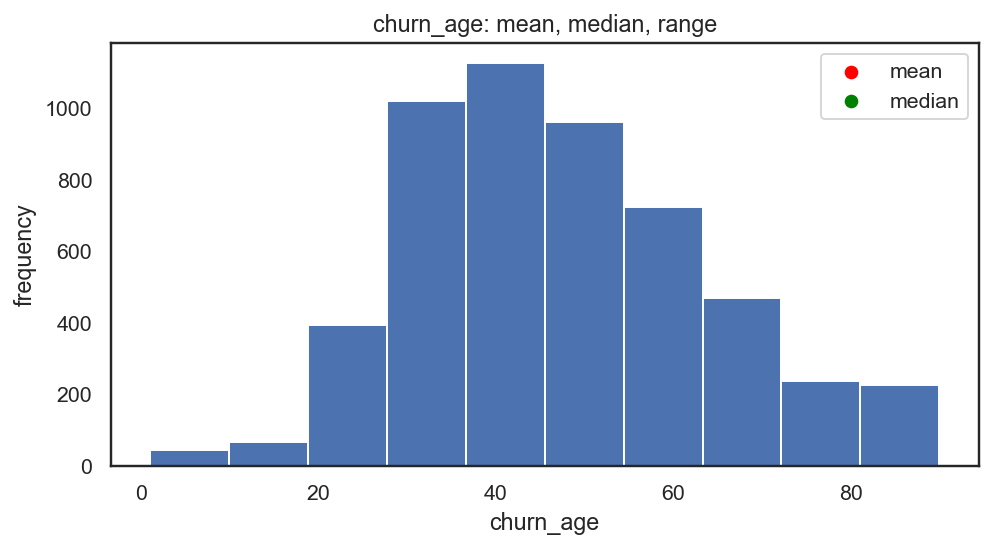

In [30]:
churn_age = data[data['churn']==1]['age']
# setting image resolution
plt.figure(figsize = (8,4), dpi = 140)

# Plotting histogram and descriptive summary
plt.scatter(churn_age.mean(), 0, label = 'mean', color = 'red')
plt.scatter(churn_age.median(), 0, label = 'median', color = 'green')
plt.hist(churn_age,bins=10)

# axes labels
plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()

Summary:
1. The peak occurs at the interval (36,45) that means highest number of customers age lie in this interval
2. Most customer age between 30 and 65

In [31]:
# calculating points of mean, median and standard deviation
mean = churn_age.mean()
median = churn_age.median()
stdev = churn_age.mean()- churn_age.std(), churn_age.mean()+churn_age.std() 

# checking
mean, median, stdev

(47.461216730038025, 45.0, (30.285242583286085, 64.63719087678996))

1. Mean of the churned customer age - 47.46
2. Median of the churned customer age - 45
3. Standard deviation range - (30.2,64.3)

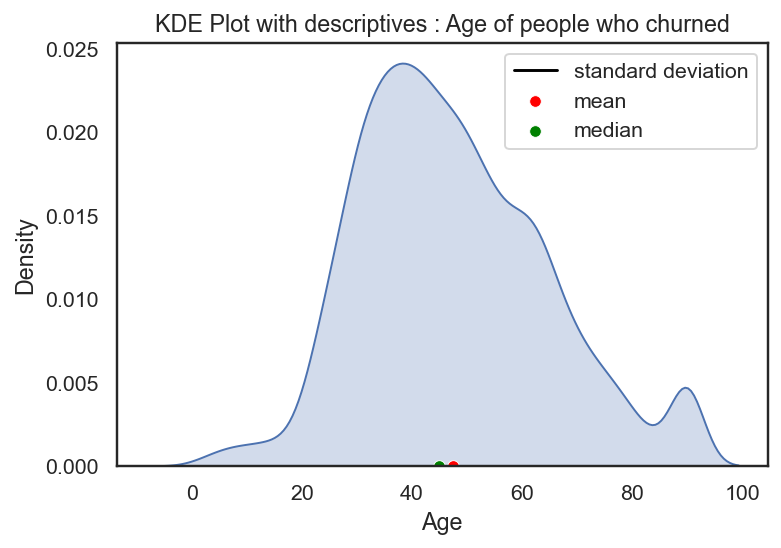

In [32]:
# plotting KDE- kernel density function (calculates the density in respective kernel) plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(churn_age, shade = True)
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

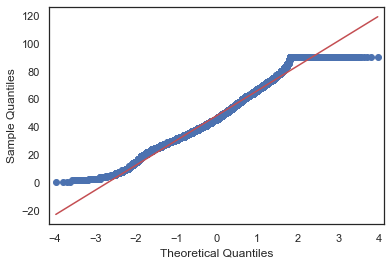

In [33]:
#qq plot explain
sm.qqplot(data['age'], line='s') 
py.show() 

Summary :

1. Larger values are not as large/extreme as expected from a Normal Distribution
2. Smaller values are not as smaller/extreme as expected from a Normal Distribution

In [34]:
data['age'].skew()

0.33058929557517264

In [35]:
data['age'].kurtosis()

-0.16866785691275865

In [36]:
# calculating measures
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()


# checking
v_mean, v_median, v_mode

(2091.1441054189277,
 2154.0,
 0    2251
 1    2260
 dtype: int64)

In [37]:
print(data[data['vintage']==2251].shape[0])
print(data[data['vintage']==2260].shape[0])

69
69


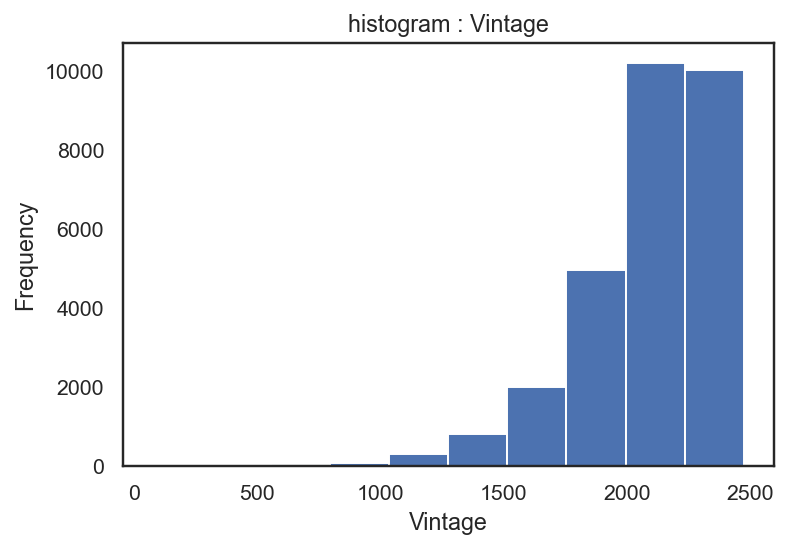

In [38]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['vintage'])
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("histogram : Vintage")
plt.show()

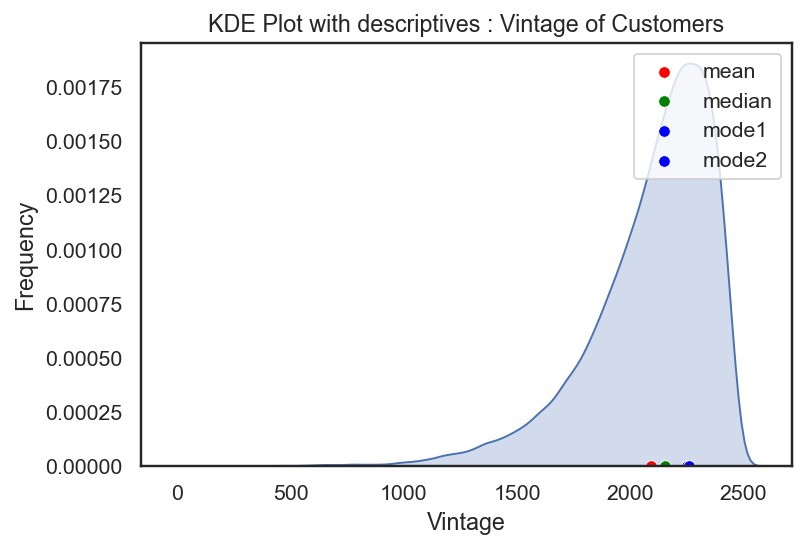

In [39]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot( [v_mean], [0], color='red', label='mean')
sns.scatterplot( [v_median], [0], color='green', label='median')
sns.scatterplot( [v_mode[0]],[0], color='blue', label='mode1')
sns.scatterplot( [v_mode[1]],[0], color='blue', label='mode2')


plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Vintage of Customers")
plt.show()

KDE Pot expalins the left skewness in the vintage distribution. More values are in the range of 2000-2500

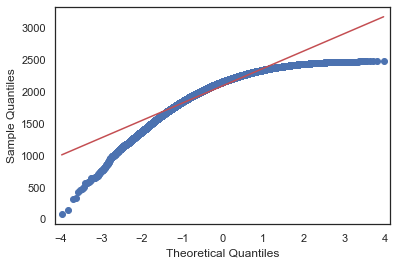

In [40]:
#qq plot explain - for checking how close the values are to normal distribution
# red line is the normal distribution, while the blue line is the real distribution of the variable
sm.qqplot(data['vintage'], line='s') 
py.show() 

In [41]:
#Kurtosis Positive
data['vintage'].kurtosis()

2.7234245375227926

In [42]:
#Kurtosis Positive
data['vintage'].skew()

-1.3889357082821185

# 4. Exploratory Data Analysis (Univariate)

# 4.a) EDA- For numerical variables

In [43]:
#Univariate Analysis : For numerical variables
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [44]:
#Segregating variables into group
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [45]:
def UNA_numeric(data,var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3),dpi=100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    mean = data[i].mean()
    median = data[i].median()
    std_ev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    points = mean-std_ev,mean+std_ev

    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i],shade=True)
    sns.lineplot(points,[0,0],color='black',label='std_ev')
    sns.scatterplot([mini,maxi],[0,0],color='orange',label='min/max')
    sns.scatterplot(mean,[0],color='red',label='mean')
    sns.scatterplot(median,[0],color='red',label='median')
    plt.xlabel('{}'.format(i),fontsize=20)
    plt.ylabel('density')
    plt.title('std_ev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median= {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                  round(kurt,2),
                                                                                                  round(skew,2),
                                                                                                  (round(mini,2),round(maxi,2)),
                                                                                                  round(mean,2),
                                                                                                  round(median,2)))

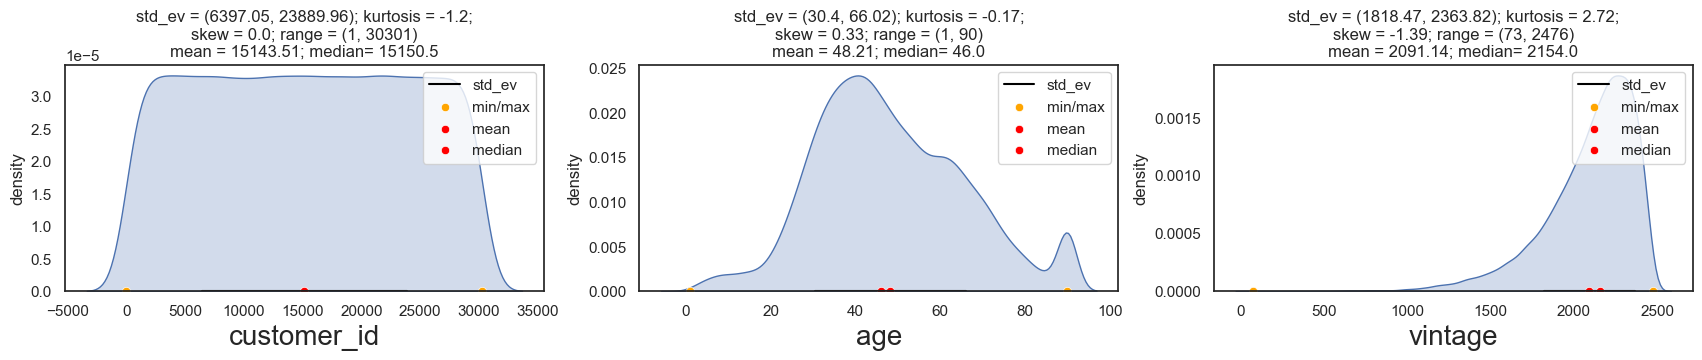

In [46]:
#customer information
UNA_numeric(data,customer_details)

Summary-
1. Customer_id follows uniform distribution
2. Customer_id does not provide any information, and can be deleted from the data
3. Median age is 46
4. Most of the customer age is between 30 to 66, quite bias towards young age customer
5. Most customer has joined between the 2000-25000, left skewed

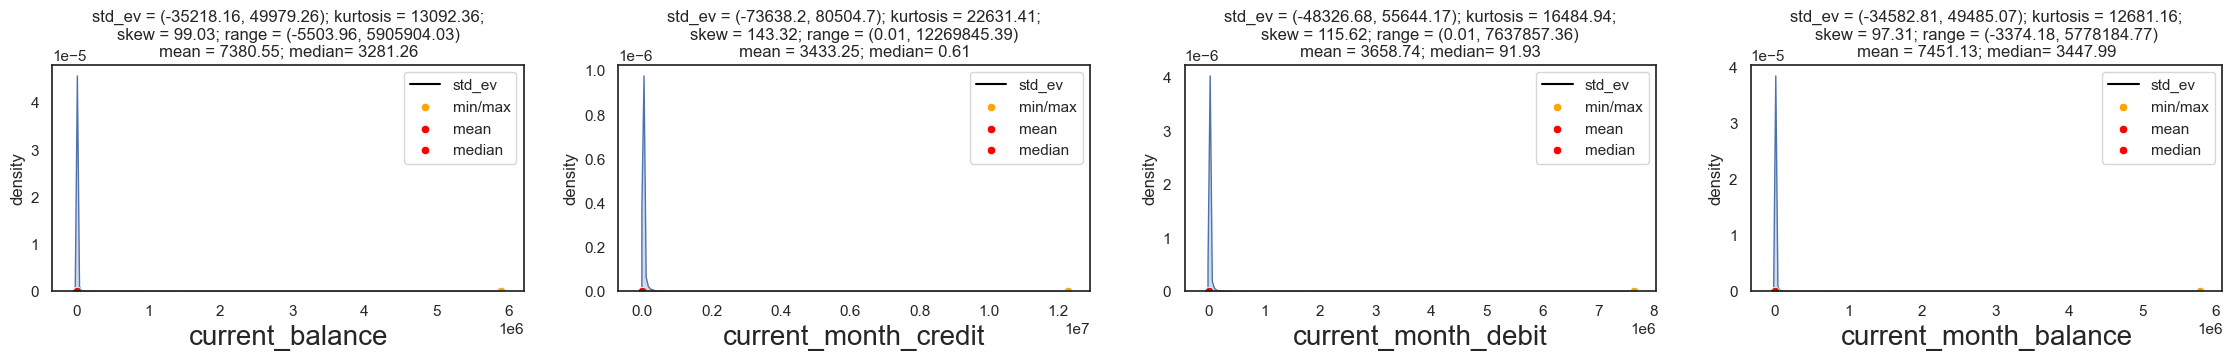

In [47]:
UNA_numeric(data, current_month)

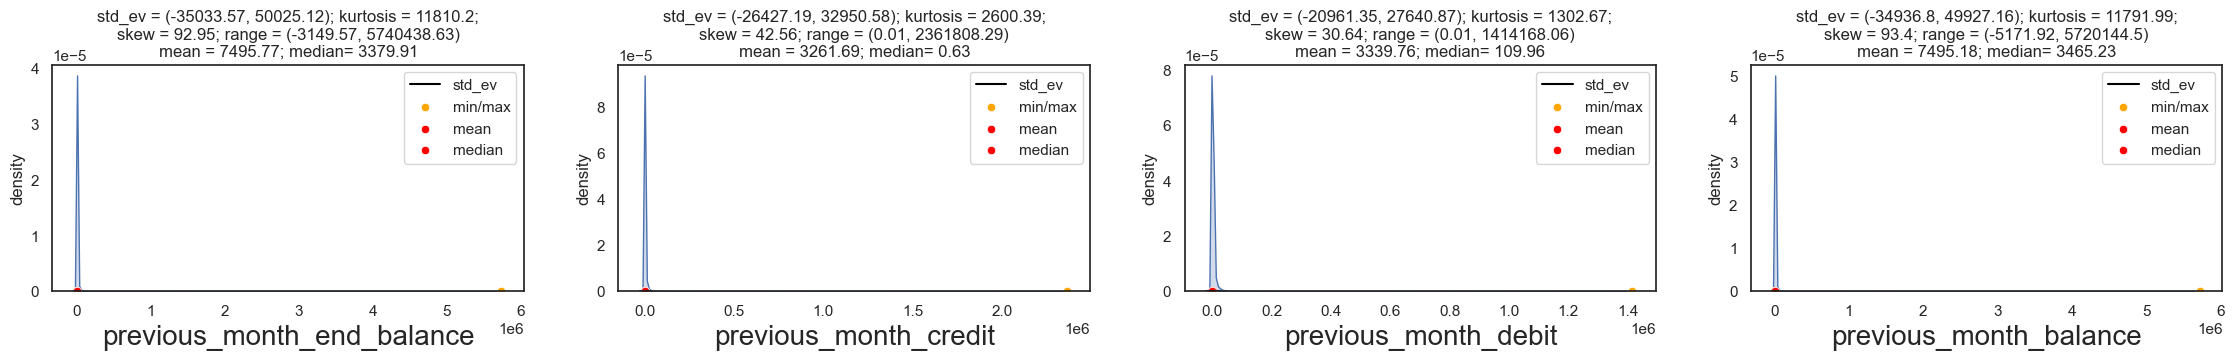

In [48]:
UNA_numeric(data, previous_month)
#Looks similar to current month

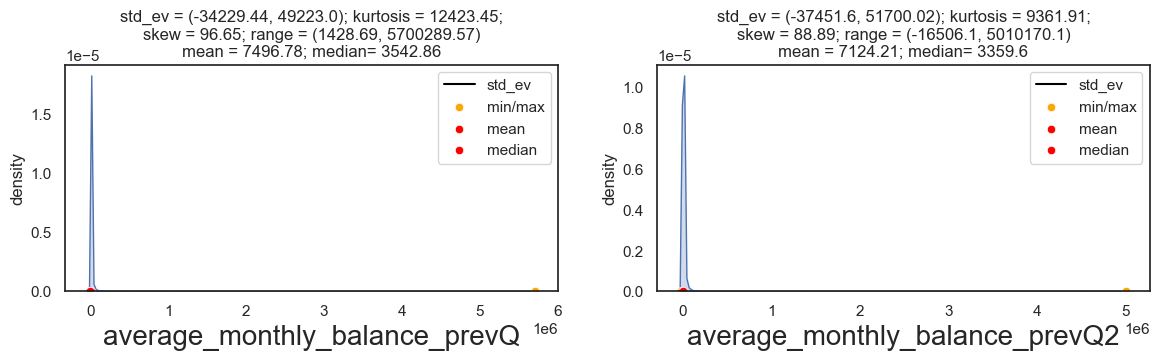

In [49]:
UNA_numeric(data, previous_quarters)

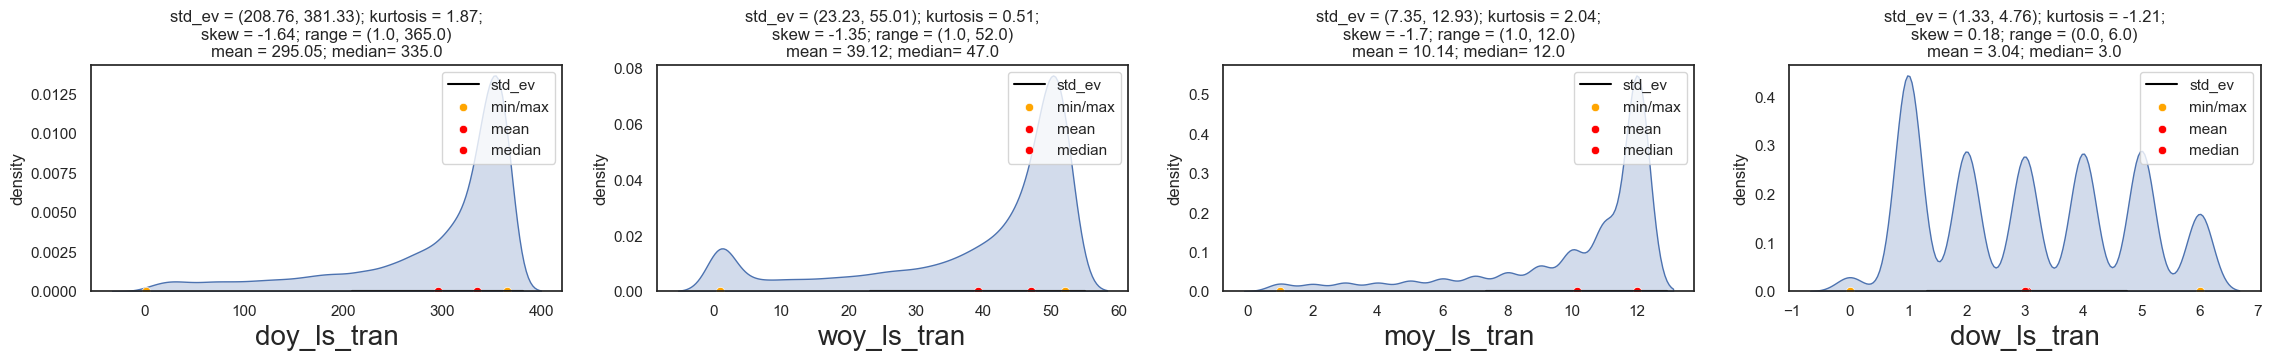

In [50]:
UNA_numeric(data, transaction_date)

1. Most of the transaction has happened in the last 60 days
2. transactions happening on monday

# 4.b) EDA- for categorical variables

In [51]:
#distribution of gender
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [52]:
data['gender'].value_counts()/sum(data['gender'].value_counts().values)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [53]:
data['occupation'].nunique()

5

In [54]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

In [55]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

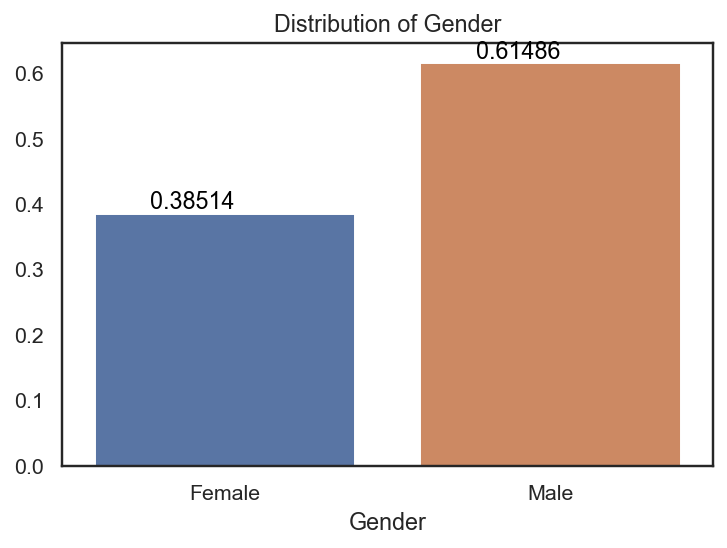

In [56]:
#Bernouli
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

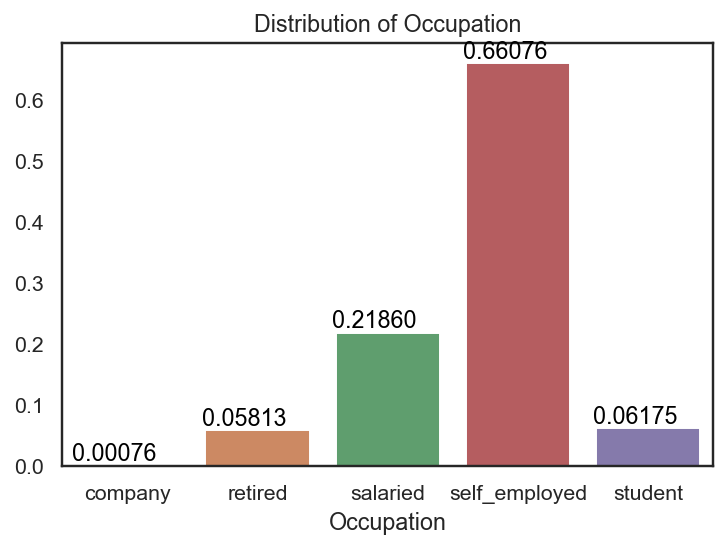

In [57]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

In [58]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
last_transaction          object
dtype: object

In [59]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

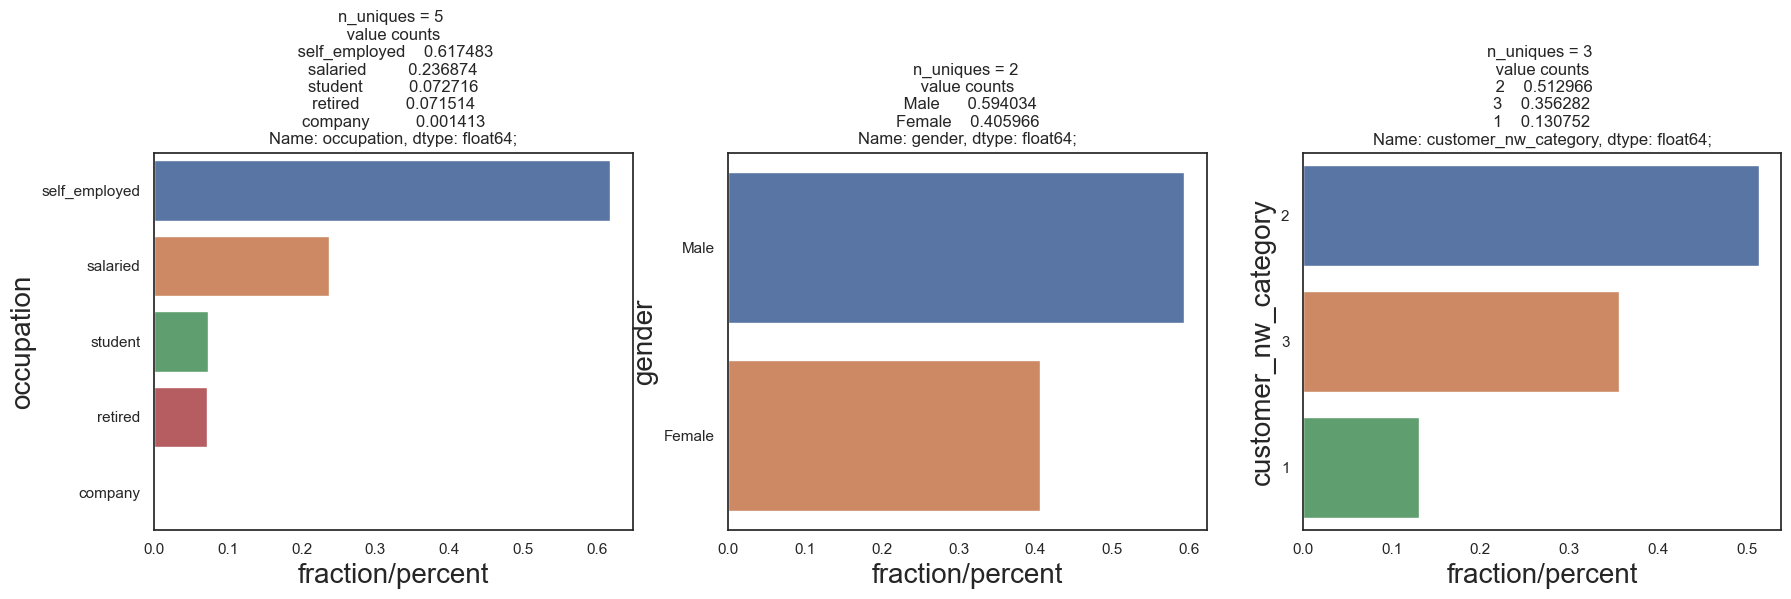

In [60]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

1. Majority of people are self employed
2. Male accounts are 1.5 times than the accounts of females
3. Half of all the accounts belong to third category

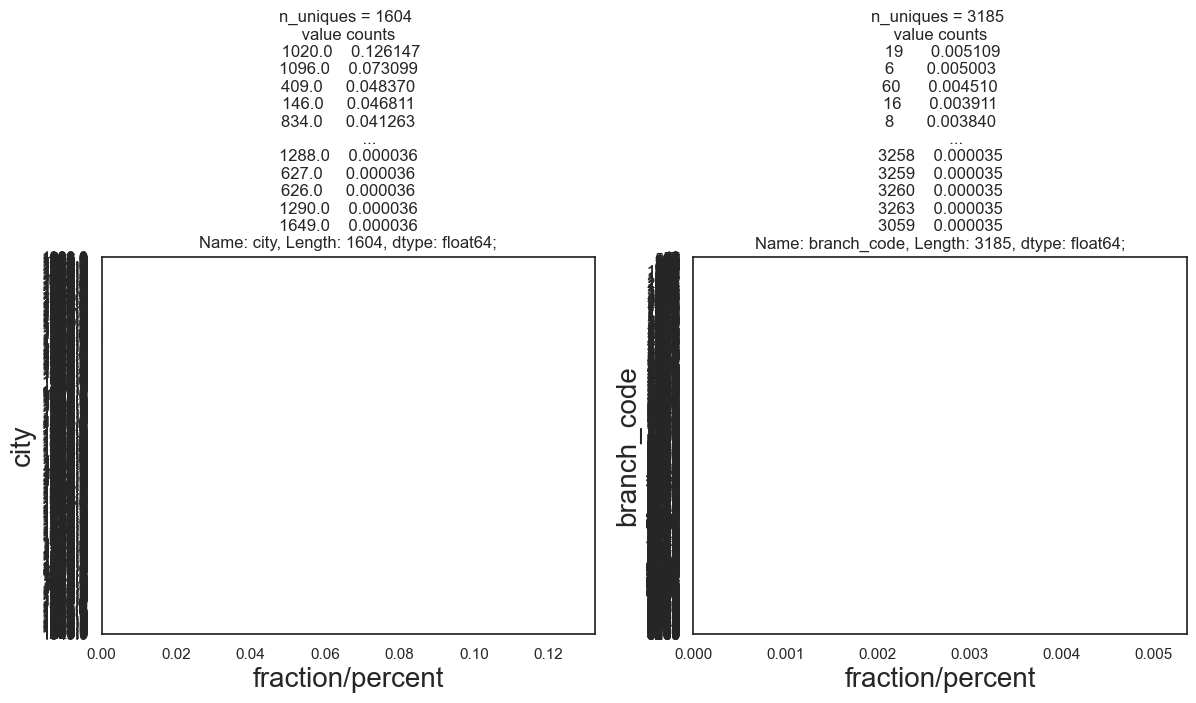

In [61]:
UVA_category(data, ['city', 'branch_code'])

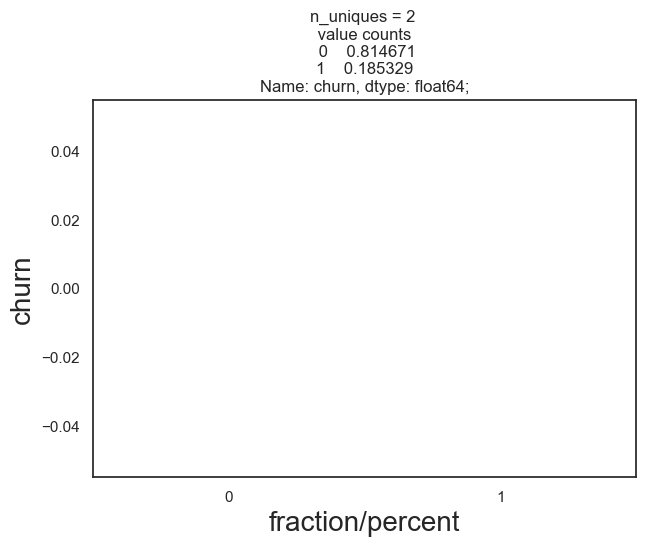

In [62]:
UVA_category(data, ['churn'])